In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from readSu import read_su

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [8]:
traces = read_su('things/su_model/DENISE_sd_y.su' + str(6812) + '.shot1')

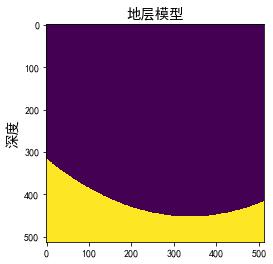

In [84]:
data = np.fromfile(r'things/su_model/model_sd_6812.vp', dtype=np.float32)
vpdata = data.reshape(512, 512)
plt.title("地层模型",fontsize='x-large')
plt.ylabel("深度",fontsize='x-large')
plt.imshow(vpdata.T)
plt.savefig(r'things/地层模型_对应展示的处理的道数据.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

In [4]:
traces.shape

(10240, 33)

In [6]:
traces.T.shape

(33, 10240)

In [10]:
tracesT = traces.T

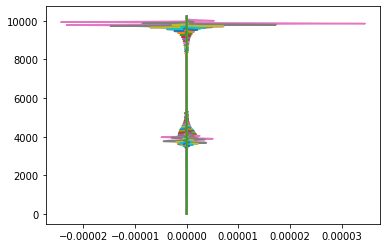

In [27]:
index = [i for i in range(10240)]
for i in range(33):
    plt.plot(tracesT[i],index)

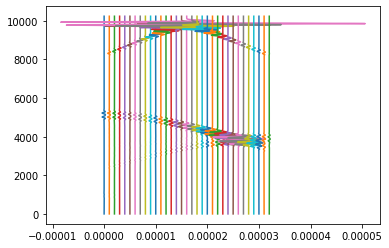

In [30]:
index = [i for i in range(10240)]
for i in range(33):
    plt.plot(tracesT[i]+i*1e-6,index)

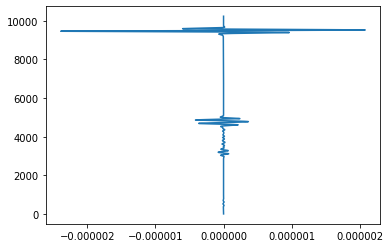

In [32]:
plt.plot(tracesT[12],index)

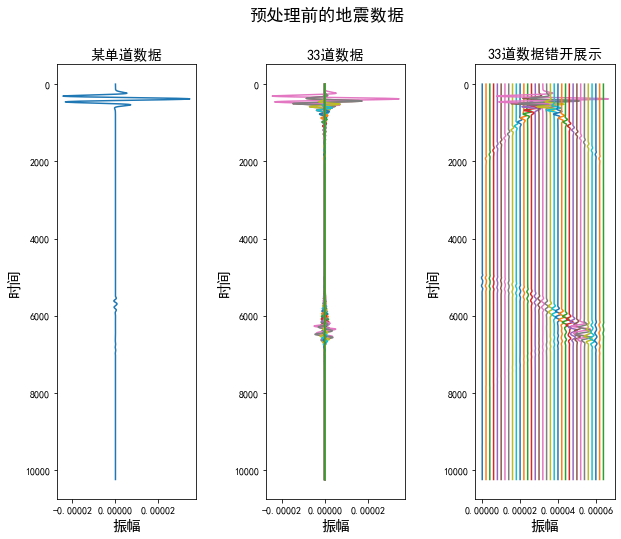

In [79]:
index = [i for i in range(10240)]
plt.figure(figsize=(10,8))
plt.suptitle("预处理前的地震数据",fontsize='xx-large',y=0.98)
plt.subplot(1, 3, 1)
plt.title("某单道数据",fontsize='x-large')
plt.ylabel("时间",fontsize='x-large')
plt.xlabel("振幅",fontsize='x-large')
plt.plot(tracesT[16][::-1],index)
ax = plt.gca() 
ax.invert_yaxis()

plt.subplot(1, 3, 2)
plt.title("33道数据",fontsize='x-large')
plt.ylabel("时间",fontsize='x-large')
plt.xlabel("振幅",fontsize='x-large')
for i in range(33):
    plt.plot(tracesT[i][::-1],index)
ax = plt.gca() 
ax.invert_yaxis()

plt.subplot(1, 3, 3)
plt.title("33道数据错开展示",fontsize='x-large')
plt.ylabel("时间",fontsize='x-large')
plt.xlabel("振幅",fontsize='x-large')
for i in range(33):
    plt.plot(tracesT[i][::-1]+i*2e-6,index)
plt.subplots_adjust(wspace=0.5, hspace=0.1)
ax = plt.gca() 
ax.invert_yaxis()
plt.savefig(r'things/预处理前的地震数据.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

In [80]:
amp = 1.9e6
epison = 5e-07
# 道数据直达波和反射波大小调整
tracesT_ = tracesT.clip(-epison, epison)
# 数据大约在 -1 到 1 之间
tracesT_ = amp * tracesT_

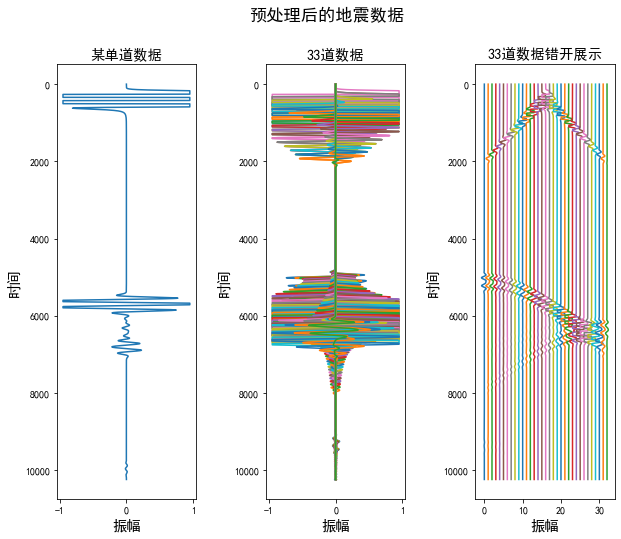

In [82]:
index = [i for i in range(10240)]
plt.figure(figsize=(10,8))
plt.suptitle("预处理后的地震数据",fontsize='xx-large',y=0.98)
plt.subplot(1, 3, 1)
plt.title("某单道数据",fontsize='x-large')
plt.ylabel("时间",fontsize='x-large')
plt.xlabel("振幅",fontsize='x-large')
plt.plot(tracesT_[16][::-1],index)
ax = plt.gca() 
ax.invert_yaxis()

plt.subplot(1, 3, 2)
plt.title("33道数据",fontsize='x-large')
plt.ylabel("时间",fontsize='x-large')
plt.xlabel("振幅",fontsize='x-large')
for i in range(33):
    plt.plot(tracesT_[i][::-1],index)
ax = plt.gca() 
ax.invert_yaxis()

plt.subplot(1, 3, 3)
plt.title("33道数据错开展示",fontsize='x-large')
plt.ylabel("时间",fontsize='x-large')
plt.xlabel("振幅",fontsize='x-large')
for i in range(33):
    plt.plot(tracesT_[i][::-1]+i,index)
plt.subplots_adjust(wspace=0.5, hspace=0.1)
ax = plt.gca() 
ax.invert_yaxis()
plt.savefig(r'things/预处理后的地震数据.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

In [85]:
import imageio

In [86]:
img = imageio.imread('things/6812.png')

In [87]:
img.shape

(561, 288, 4)

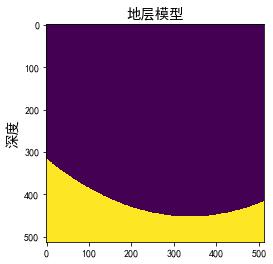

In [88]:
data = np.fromfile(r'things/su_model/model_sd_6812.vp', dtype=np.float32)
vpdata = data.reshape(512, 512)
plt.title("地层模型",fontsize='x-large')
plt.ylabel("深度",fontsize='x-large')
plt.imshow(vpdata.T)
plt.savefig(r'things/地层模型_对应展示的处理的道数据.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

In [132]:
mat1 = np.zeros((8,8),dtype=np.int32)
mat1[0:4,:] = 1500
mat1[4:,:] = 2200

mat1_label = np.zeros((8,8),dtype=np.int32)
mat1_label[0:4,:] = 1
mat1_label[4:,:] = 5

mat2 = np.zeros((8,8),dtype=np.int32)
mat2[0:4,:] = 1600
mat2[4:,:] = 2200

mat2_labels = np.zeros((8,8),dtype=np.int32)
mat2_labels[0:4,:] = 2
mat2_labels[4:,:] = 5

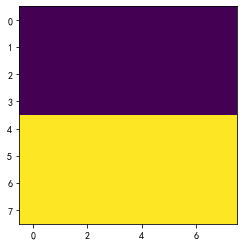

In [124]:
plt.imshow(mat2)

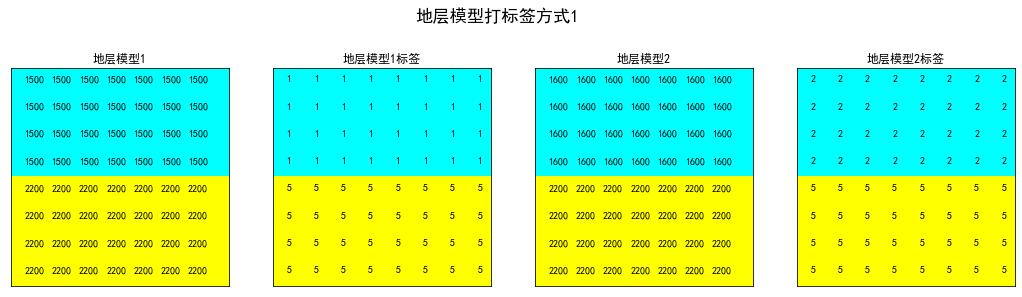

In [175]:
# 1500 : 1 1600:2 1700:3 1800:4 2200:5

plt.figure(figsize=(18,12))
plt.suptitle("地层模型打标签方式1",fontsize='xx-large',y=0.7)

plt.subplot(1,4,1)
colors_list = ['cyan', 'Lime','yellow'] 
cmap = colors.ListedColormap(colors_list)
plt.imshow(mat1, cmap=cmap)
for i in range(mat1.shape[0]):
    for j in range(mat1.shape[1]-1):
        plt.text(x=j, y=i, s=mat1[i, j])    
plt.xticks([])
plt.yticks([])
plt.title("地层模型1")

plt.subplot(1,4,2)
plt.imshow(mat1_label, cmap=cmap)
for i in range(mat1_label.shape[0]):
    for j in range(mat1_label.shape[1]):
        plt.text(x=j, y=i, s=mat1_label[i, j])        
plt.xticks([])
plt.yticks([])
plt.title("地层模型1标签")

plt.subplot(1,4,3)
plt.imshow(mat2, cmap=cmap)
for i in range(mat2.shape[0]):
    for j in range(mat2.shape[1]-1):
        plt.text(x=j, y=i, s=mat2[i, j]) 
plt.xticks([])
plt.yticks([])
plt.title("地层模型2")

plt.subplot(1,4,4)
plt.imshow(mat2_labels, cmap=cmap)
for i in range(mat2_labels.shape[0]):
    for j in range(mat2_labels.shape[1]):
        plt.text(x=j, y=i, s=mat2_labels[i, j])  
plt.xticks([])
plt.yticks([])
plt.title("地层模型2标签")

plt.savefig(r'things/地层模型打标签方式1.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

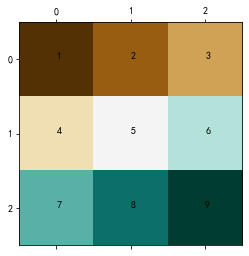

In [97]:
mat = np.arange(1, 10).reshape(3, 3)

plt.matshow(mat, cmap=plt.cm.BrBG)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        plt.text(x=j, y=i, s=mat[i, j])
               
plt.show()

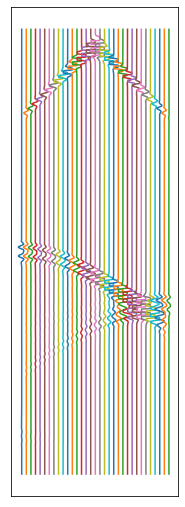

In [183]:
plt.figure(figsize=(3,9))
for i in range(33):
    plt.plot(tracesT_[i][::-1]+i,index)
plt.subplots_adjust(wspace=0.5, hspace=0.1)
ax = plt.gca() 
ax.invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.savefig(r'things/道数据模板.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

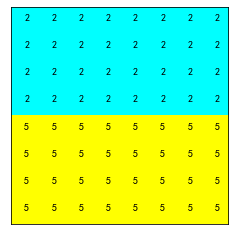

In [185]:
plt.imshow(mat2_labels, cmap=cmap)
for i in range(mat2_labels.shape[0]):
    for j in range(mat2_labels.shape[1]):
        plt.text(x=j, y=i, s=mat2_labels[i, j])  
plt.xticks([])
plt.yticks([])
plt.savefig(r'things/预测方式1模板.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

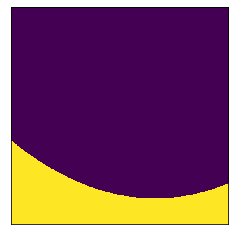

In [186]:
data = np.fromfile(r'things/su_model/model_sd_6812.vp', dtype=np.float32)
vpdata = data.reshape(512, 512)
plt.xticks([])
plt.yticks([])
plt.imshow(vpdata.T)
plt.savefig(r'things/地层模型_模板.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

In [48]:
# 时域标签计算

data = np.fromfile(r'things/su_model/model_sd_6812.vp', dtype=np.float32)
vpdata1 = data.reshape(512, 512)

labels_512_1 = np.zeros((1,512),dtype=np.float32)
up_speed = -1
for i in range(512):
    for index, j in enumerate(vpdata1.T[:, i]):
        if up_speed == -1:
            up_speed = j
        if up_speed != j:
            labels_512_1[0, i] = index
            break
labels_512_1 = labels_512_1/up_speed

data = np.fromfile(r'things/su_model/model_sd_4861.vp', dtype=np.float32)
vpdata2 = data.reshape(512, 512)

labels_512_2 = np.zeros((1,512),dtype=np.float32)
up_speed = -1
for i in range(512):
    for index, j in enumerate(vpdata2.T[:, i]):
        if up_speed == -1:
            up_speed = j
        if up_speed != j:
            labels_512_2[0, i] = index
            break
labels_512_2 = labels_512_2/up_speed

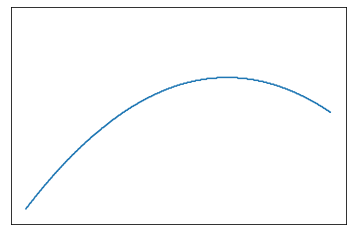

In [90]:
# plt.xlabel("水平",fontsize='x-large')
# plt.ylabel('t',fontsize='x-large')
plt.xticks([])
plt.yticks([])
plt.ylim(0.20,0.35)
# plt.yticks(fontproperties = 'Times New Roman' ,size = 6,rotation = 90)
plt.plot([i for i in range(512)],labels_512_1[0])
plt.savefig(r'things/预测方式2模板.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

In [62]:
data = np.fromfile(r'things/su_model/model_sd_6812.vp', dtype=np.float32)
vpdata1 = data.reshape(512, 512)
data = np.fromfile(r'things/su_model/model_sd_4861.vp', dtype=np.float32)
vpdata2 = data.reshape(512, 512)

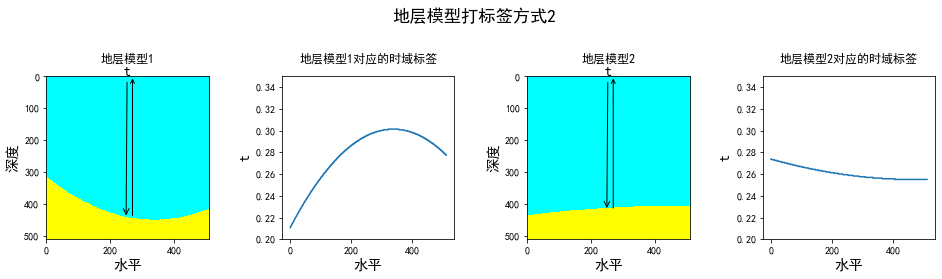

In [85]:

plt.figure(figsize=(16,3))
plt.suptitle("地层模型打标签方式2",fontsize='xx-large',y=1.2)

colors_list = ['cyan', 'Lime','yellow'] 
cmap = colors.ListedColormap(colors_list)
plt.subplot(1,4,1)
plt.xlabel("水平",fontsize='x-large')
plt.ylabel("深度",fontsize='x-large')
plt.title("地层模型1",y=1.05)
plt.annotate('t',fontsize='x-large',xy=(250,443),xytext=(242,0),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.annotate('',xy=(270,0),xytext=(270,443),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

plt.imshow(vpdata1.T,cmap = cmap)


plt.subplot(1,4,2)
plt.title('地层模型1对应的时域标签',y=1.05)
plt.xlabel("水平",fontsize='x-large')
plt.ylabel('t',fontsize='x-large')
plt.ylim(0.20,0.35)
# plt.yticks(fontproperties = 'Times New Roman' ,size = 6,rotation = 90)
plt.plot([i for i in range(512)],labels_512_1[0])


plt.subplot(1,4,3)
plt.xlabel("水平",fontsize='x-large')
plt.ylabel("深度",fontsize='x-large')
plt.title("地层模型2",y=1.05)
plt.annotate('t',fontsize='x-large',xy=(250,420),xytext=(242,0),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.annotate('',xy=(270,0),xytext=(270,420),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.imshow(vpdata2.T,cmap = cmap)

plt.subplot(1,4,4)
plt.title('地层模型2对应的时域标签',y=1.05)
plt.xlabel("水平",fontsize='x-large')
plt.ylabel('t',fontsize='x-large')
plt.ylim(0.20,0.35)
# plt.yticks(fontproperties = 'Times New Roman' ,size = 6,rotation = 90)
plt.plot([i for i in range(512)],labels_512_2[0])
plt.subplots_adjust(wspace=0.4, hspace=0.1)
plt.savefig(r'things/地层模型打标签方式2.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)

In [26]:
vpdata.T[443,256]

2200.0